## Impact of the parameters: Jet opening angle

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV)
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part shows the impact on the halo effect if we play with the jet opening angle.

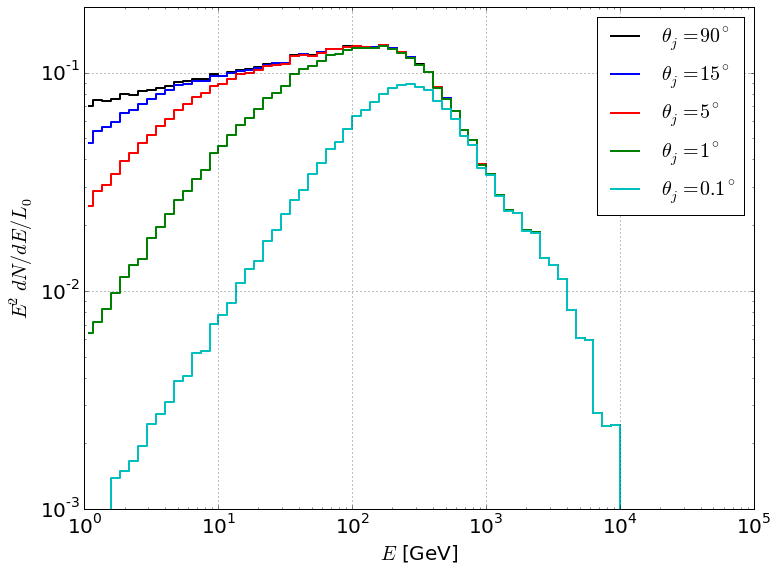

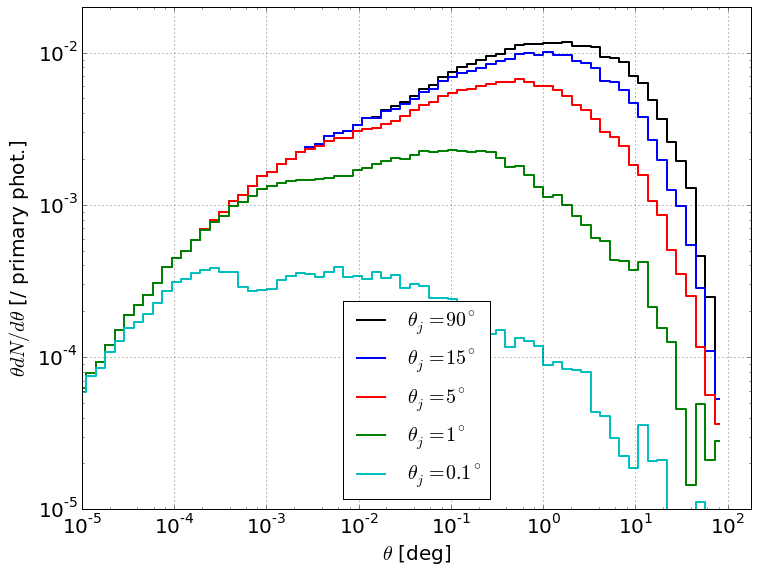

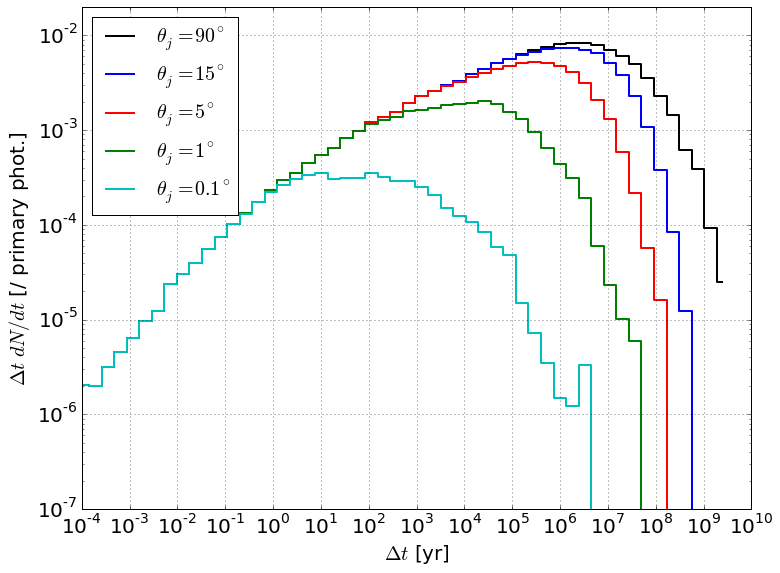

In [4]:
%matplotlib inline
import src.distribution
simus  = ["theta_j=90","theta_j=15","theta_j=5","theta_j=1","theta_j=0.1"]
colors = ['k','b','r','g','c','m','y']
src.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-3,2e-1])
src.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
src.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

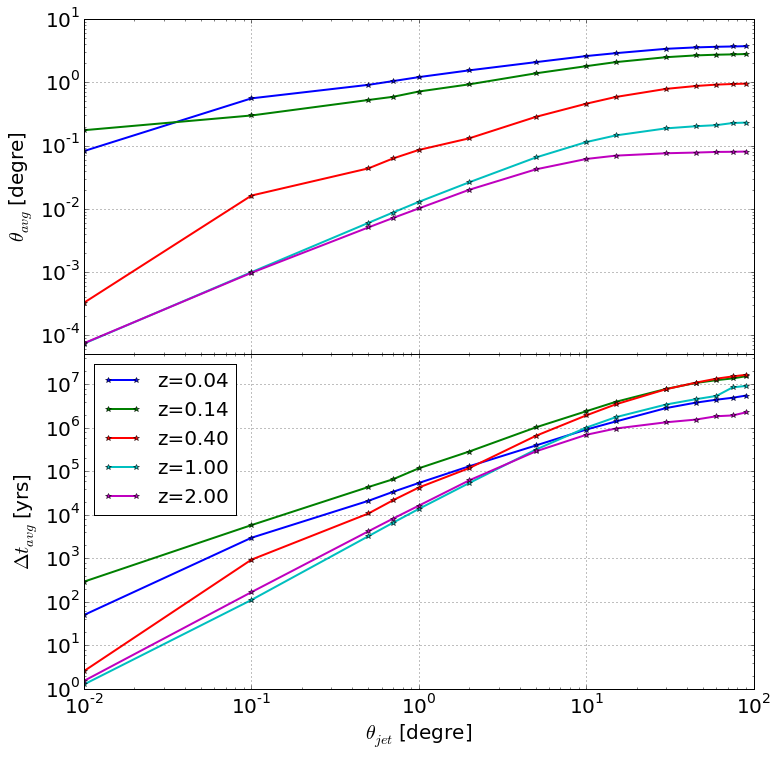

In [4]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp
from matplotlib import gridspec, rcParams
from numpy import loadtxt, sin, arcsin, size
from src.analytic import distance, lambda_gg

label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size 

fig1 = figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
fig1.subplots_adjust(hspace=0)
ax1 = fig1.add_subplot(gs[0])
ax2 = fig1.add_subplot(gs[1],sharex=ax1)

theta_mean = loadtxt("Results/theta_mean_vs_jet_opening.dat")
dt_mean = loadtxt("Results/delay_mean_vs_jet_opening.dat")
Redshifts = theta_mean[1:,0]
i=1
for z in Redshifts:
    p, = ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'-*',linewidth=2)
    #ax1.plot(theta_mean[0,1:],abs(arcsin(sin(theta_mean[0,1:])*lambda_gg(1e5,z)[1]/distance(z)[1])),'-.',color=p.get_color(),linewidth=2)
    ax2.plot(dt_mean[0,1:],dt_mean[i,1:],'-*',color=p.get_color(),linewidth=2,label="z=%1.2f"%float(z))
    i+=1    

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.set_ylim([5e-5,10])
ax1.grid(b=True,which='major')
#ax1.legend(loc="best")
ax1.set_ylabel("$\\theta_{avg}$ [degre]",fontsize=label_size)
xticklabels = ax1.get_xticklabels()
setp(xticklabels, visible=False)

ax2.set_xscale('log')   
ax2.set_yscale('log')
ax2.set_ylim([1,5e7])
ax2.grid(b=True,which='major')
ax2.legend(loc="best",fontsize=label_size)
ax2.set_xlabel("$\\theta_{jet}$ [degre]",fontsize=label_size)
ax2.set_ylabel("$\\Delta t_{avg}$ [yrs]",fontsize=label_size)   

show()

Halo effect is also depending on the source jet opening angle. Figure  shows
the photons mean arrival angle in the GeV band versus the jet opening angle of the source assuming
that the jet is oriented toward the observer at different redshifts. Size of the halo appears to
increase with the jet opening angle but also with the distance. Indeed the ratio of the halo size
between a collimated jet ($\approx 0.1^\circ$) and a isotropic source ($=90^\circ$) is 4 - 5 at 
z=0.1 and 2 at z=2. Thus the halo of a far source is less influenced by the jet than a close one.


## Misaligned jet: Impact du $\theta_{obs}$

* étude en considérant un jet d'ouverture $\alpha_{jet}=5^\circ$
* on jouera sur $\theta_{obs}$ angle par rapport à l'observateur

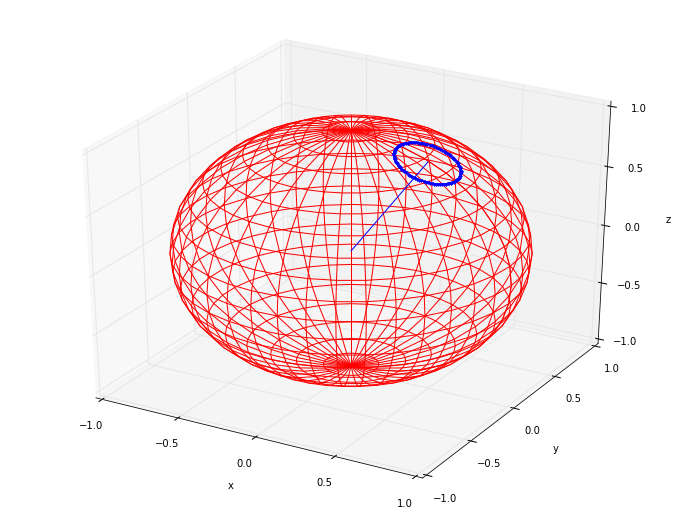

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
degre = np.pi/180
   
def test(tobs=0.5,tjet=0.3):
   # Plot a sphere in the observer spherical coordinates
   #----------------------------------------------------
   fig = plt.figure(figsize=(12,9))
   ax = plt.axes(projection='3d')    
   
   u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:21j]
   x=np.cos(u)*np.sin(v)
   y=np.sin(u)*np.sin(v)
   z=np.cos(v)
   ax.plot_wireframe(x, y, z, color="r")
    
   r = np.arange(0,1,.01)
   x=r*np.sin(tobs)*np.cos(0)
   y=r*np.sin(tobs)*np.sin(0)
   z=r*np.cos(tobs)
   ax.plot(x,y,z,color='b')
    

   # Circle in the spherical coordinates associated to the jet
   #----------------------------------------------------------
   # Number of points
   n = 100
   # Azimuthal angle Phi0
   pmin = 0
   pmax = 2*np.pi
   p0 = pmin + (pmax-pmin)*np.arange(n)/(n-1.)
   # Polar angle Theta0
   t0 = tjet*np.ones(n)
    
   # Circle in the spherical coordinates associates to the observer
   #---------------------------------------------------------------
   # Polar angle Theta
   st = np.cos(t0)*np.cos(tobs) + np.sin(t0)*np.sin(tobs)*np.cos(p0)
   t = np.arccos(st)
   # Azimuthal angle Theta
   sin_p = np.sin(t0)*np.sin(p0)/np.sin(t)
   p = np.arcsin(sin_p) 
   cos_p = ( -np.cos(t0)*np.sin(tobs) + np.sin(t0)*np.cos(tobs)*np.cos(p0))/np.sin(t)
   p[cos_p>0] = np.pi-p[cos_p>0]
    
   # Plot the circle
   #-----------------
   x = np.sin(t)*np.cos(p)
   y = np.sin(t)*np.sin(p)
   z = np.cos(t)
   ax.plot(x, y, z,marker='.')
   plt.xlim([-1,1])
   plt.ylim([-1,1])
   ax.set_zlim(-1,1)    
   plt.xlabel('x')
   plt.ylabel('y')
   ax.set_zlabel('z')
   plt.show()
   
test(tjet=0.2,tobs=0.5)

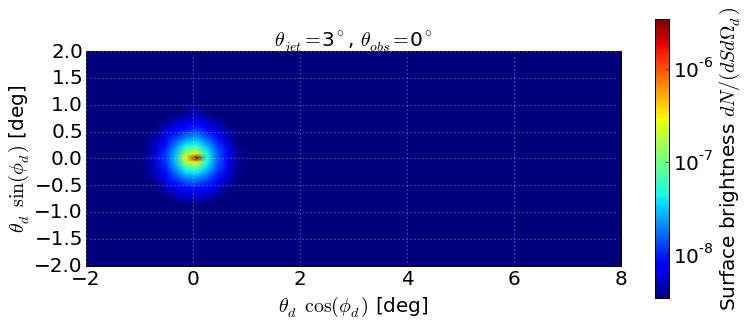

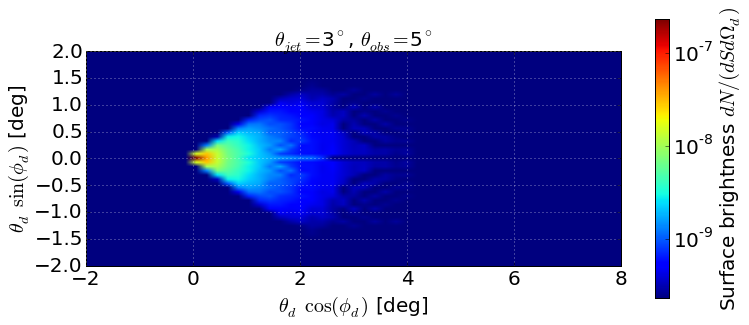

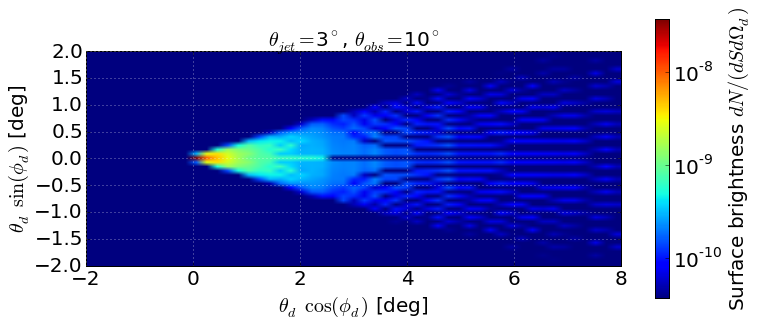

In [1]:
%matplotlib inline
from numpy import *
from modules.read import ReadProfile, resultsFile
from modules.analytic import degre, yr
from modules.distribution import distribution

from matplotlib.pyplot import figure, show
from matplotlib.colors import LogNorm
from matplotlib import rcParams
label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size 

def select_events(simulation,Erange=[1e-3,1e6],delayrange=[-1e8,1e30],powerlaw_index=1,tjet=180.,tobs=0.,generation='all'):    
   # 0 - generation
   # 1 - weight
   # 2 - energy [GeV]
   # 3 - time delay [s]
   # 4,5,6 - theta_pos, theta_dir, phi_dir [rad]
   # 7 - source photon energy [GeV]
   results = loadtxt(simulation+resultsFile,unpack=True)
   Dsource,redshift,n_phot  = ReadProfile(simulation,[2,3,4]) 
   try:
      gen_select = int(generation)
      cond = (results[0] == gen_select)
   except:
      # select photons only
      cond = (results[0]%2==0) 
   # energy selection and time selection
   cond = cond & (results[2] >= Erange[0])     & (results[2] <= Erange[1])  
   cond = cond & (results[3] >= delayrange[0]) & (results[3] <= delayrange[1])
   results = results[:,cond]

   # Apply source spectrum
   results[1] /= n_phot 
   if "simple case" not in simulation: 
      # compute intrinsic luminosity 
      powerlaw_index = float(powerlaw_index) 
      results[1]*= results[7]**(1-powerlaw_index) * log(Erange[1]/Erange[0])
      if powerlaw_index == 2:
         results[1] /= log(Erange[1]/Erange[0])
      else:
         results[1] *= (2-powerlaw_index)/(Erange[1]**(2-powerlaw_index)-Erange[0]**(2-powerlaw_index))

   # misaligned jet & jet opening angle selection 
   results = append(results,zeros((2,size(results,axis=1))),axis=0)
   phi_dj = 0
   results[8] = phi_dj
   results[9] = cos(tobs*degre)*cos(results[4])+sin(tobs*degre)*sin(results[4])*cos(phi_dj-results[6])
   tabi = results
   Nphi=200
   for phi_dj in linspace(-pi,pi,Nphi-1):
   #for phi_dj in 2*pi*random.rand(Nphi):
      results[8] = phi_dj
      results[9] = cos(tobs*degre)*cos(results[4])+sin(tobs*degre)*sin(results[4])*cos(phi_dj-results[6])
      tabi = append(tabi,results,axis=1)
   results = tabi     
   cond = (arccos(results[9])/degre < tjet)
   results = results[:,cond]         
   #if tjet < 90:
   #    sigma = sin(tjet*degre)
   #    results[1] *= exp((sin(arccos(results[9]))/sigma)**2) 
   results[1] /= Nphi * Dsource**2 *(2*pi*(1-cos(tjet*degre)))
   
   return results[1],results[2],results[3],results[5],results[8],results[7],results[0]

def test(fileId,tobs=0,tjet=180,borne=[20,20]): # degres
   weight, energy, time, theta_d, phi_d, Es, generation = select_events(fileId,Erange=[1e0,1e5],powerlaw_index=1.2,tjet=tjet,tobs=tobs)
   fig = figure(figsize=(12,5))
   ax = fig.add_subplot(111) 

   steps_by_degre = 5
   philim=float(borne[0])
   thetalim=float(borne[1])
   bining = array([int(steps_by_degre*2*thetalim)+1,int(steps_by_degre*2*philim)+1])
   limits = [[-2,2],[-2,8]]

   #H,xedges,yedges,im = ax.hist2d(theta_d*cos(phi_d-pi/2)/degre,theta_d*sin(phi_d-pi/2)/degre,bining,weights=weight,norm=LogNorm(),range=limits)
   H,xedges,yedges = histogram2d(theta_d*cos(phi_d)/degre,theta_d*sin(phi_d)/degre,bining,weights=weight,range=limits)
   lim = 1e-3*amax(H)
   H = select([H>lim,H<=lim],[H,lim])
   im = ax.imshow(H,norm=LogNorm(),extent=(-2,8,-2,2))
   cbar=fig.colorbar(im, ax=ax)
   cbar.ax.set_ylabel("Surface brightness $dN/(dSd\\Omega_d)$",fontsize=label_size)
   
   #th = linspace(0,10,100)
   #phi_max = arccos(sqrt(1-(sin(tjet*degre)/sin(tobs*degre))**2))
   #ax.plot(th*cos(phi_max),th*sin(phi_max),linewidth=2,color='k')
   #ax.plot(th*cos(phi_max),-th*sin(phi_max),linewidth=2,color='k')
   
   ax.set_xlim((-2,8))
   ax.set_ylim((-2,2))
   ax.set_xlabel("$\\theta_d$ $\\cos(\\phi_d)$ [deg]",fontsize=label_size)
   ax.set_ylabel("$\\theta_d$ $\\sin(\\phi_d)$ [deg]",fontsize=label_size)
   ax.set_title("$\\theta_{jet}=$%1.0f$^\\circ$, $\\theta_{obs}=$%1.0f$^\\circ$"%(tjet,tobs),fontsize=label_size)
   ax.grid(b=True,which='major',color='w')

fileId="Simulations/z=0.14/EGMF=1e-15G" 
#fileId="Simulations/simple case/EGMF=1e-16G" 
test(fileId,tjet=3.,tobs=0,borne=[5,5])
test(fileId,tjet=3.,tobs=5,borne=[5,5])
test(fileId,tjet=3.,tobs=10,borne=[5,5])
   
show()

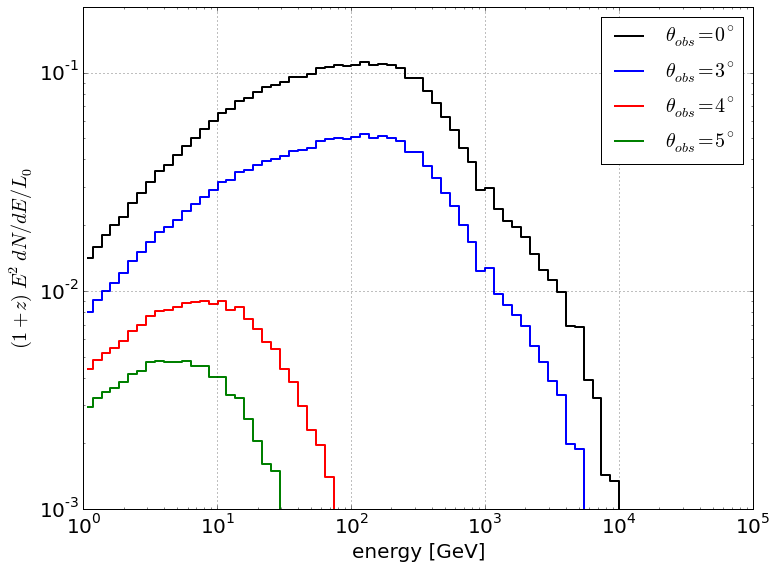

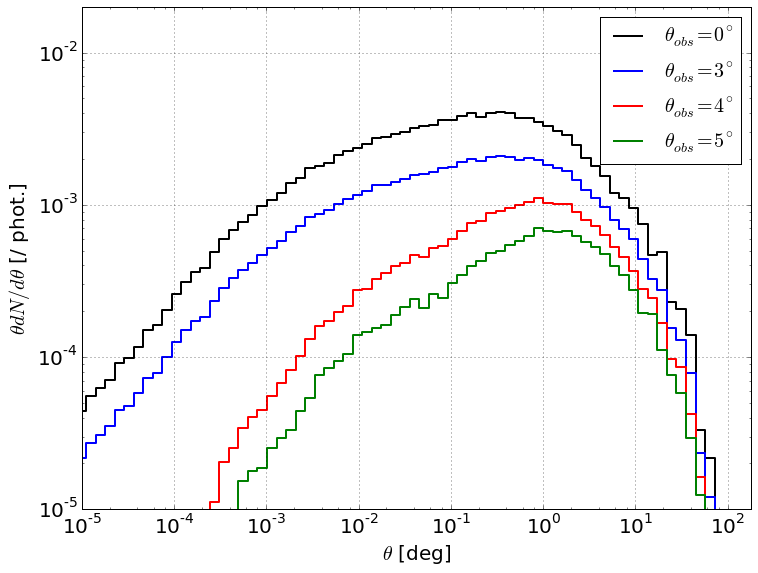

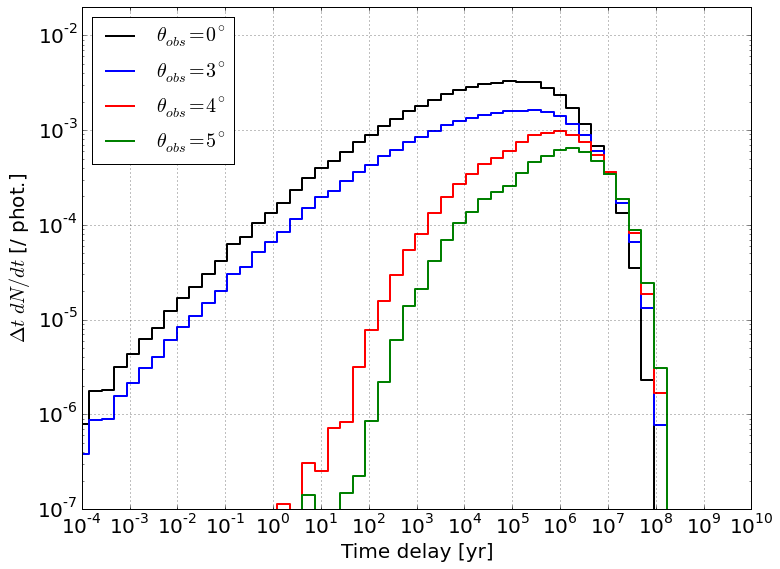

In [2]:
%matplotlib inline
import modules.distribution
simus = ["tobs=0","tobs=3","tobs=4","tobs=5"]
colors = ['k','b','r','g','c','m','y']
modules.distribution.drawSpectrum(simus,colors=colors,yrange=[1e-3,2e-1])
modules.distribution.drawArrivalAngle(simus,colors=colors,yrange=[1e-5,2e-2])
modules.distribution.drawTiming(simus,colors=colors,yrange=[1e-7,2e-2])

## Un truc pour Renaud

1.00033358195 1.59955366441 3e-16 100.0 0.23 962.441225774 10000.0
1.00001954219 1.59998205914 3e-16 100.0 0.23 962.441225774 10000.0


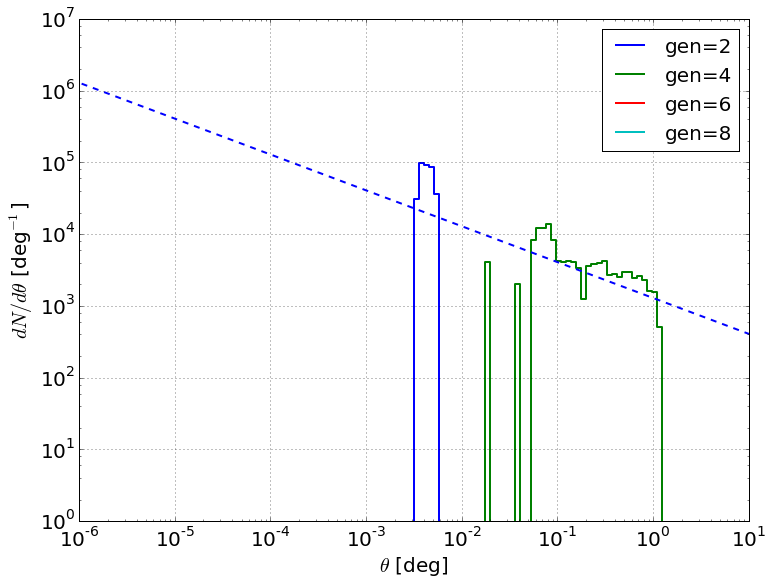

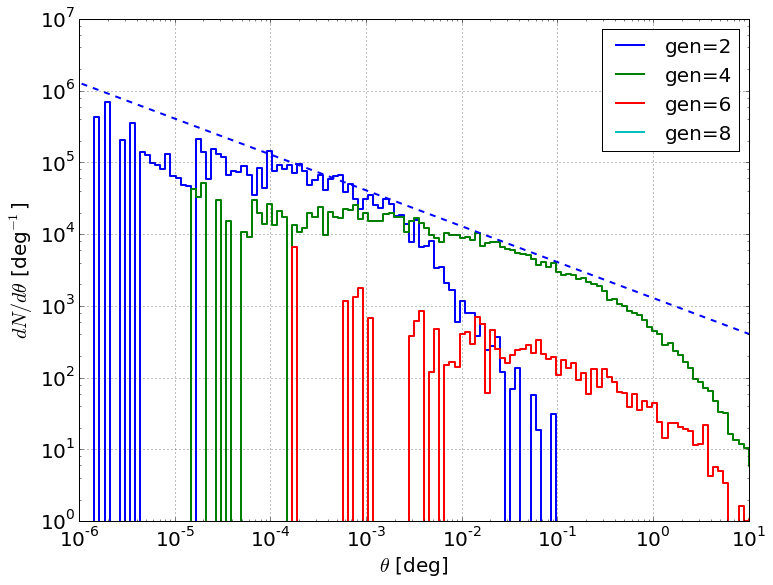

In [1]:
%matplotlib inline
from modules.read import select_events, ReadProfile
from modules.distribution import distribution
from numpy import histogram, log10,logspace, shape, arange, pi, sqrt
from numpy import append, zeros, sin, size
from matplotlib.pyplot import figure, show
from matplotlib import rcParams
from modules.constants import degre
from modules.analytic import Analytic_dNdtheta

label_size = 20
rcParams['xtick.labelsize'] = label_size
rcParams['ytick.labelsize'] = label_size

def test(fileId):
   weight, energy, time, theta_d, phi_d, Esource, generation = select_events(fileId,Erange=[1,1.6])
   B, E0, Ds, zs, N = ReadProfile(fileId,[0,1,2,3,4])
   print min(energy), max(energy), B, E0, zs, Ds, N

   ax = figure(figsize=(12,9)).add_subplot(111)
   theta_range = [1e-6*degre,90*degre] # degre
   nbBins=150

   theta,dndtheta = distribution(theta_d,weight,nbBins,theta_range)
   #ax.plot(theta/degre,dndtheta*degre,color="k",drawstyle='steps-mid',linewidth=2,label="all gen")
   for gen in [2,4,6,8]:
      cond = (generation==gen) 
      theta,dndtheta = distribution(theta_d[cond],weight[cond],nbBins,theta_range)
      ax.plot(theta/degre,dndtheta*degre,drawstyle='steps-mid',linestyle='-',linewidth=2,label="gen=%1d"%gen)

   ax.plot(theta/degre,2*Analytic_dNdtheta(theta,fileId)*degre,'--b',linewidth=2)

   ax.legend(loc="best",fontsize=label_size)
   ax.set_xscale('log')
   ax.set_yscale('log')
   ax.set_xlim([1e-6,10])
   ax.set_ylim([1e0,1e7])
   ax.grid(b=True,which='major')
   ax.set_xlabel("$\\theta$ [deg]",fontsize=label_size)
   ax.set_ylabel("$dN/d\\theta$ [deg$^{-1}$]",fontsize=label_size)

#test("Simulations/z=0.23/EGMF=1e-16G")
test("Simulations/simple case/all approx")
test("Simulations/simple case/z=0.23")
show()

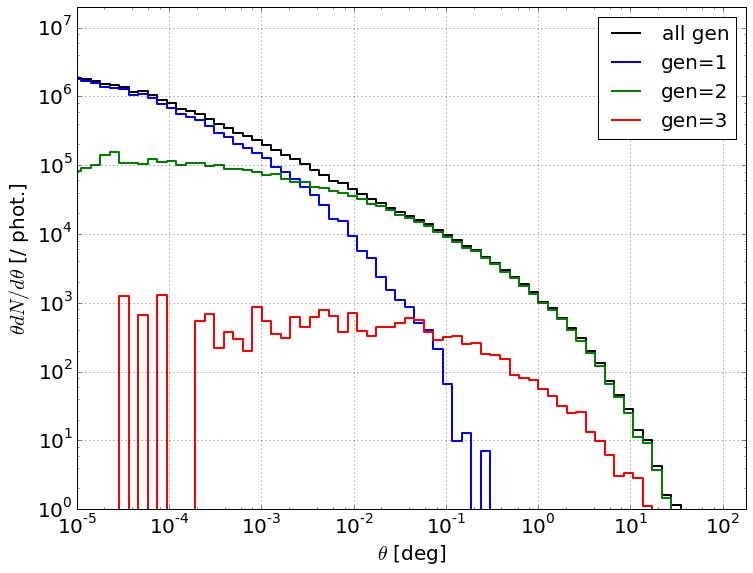

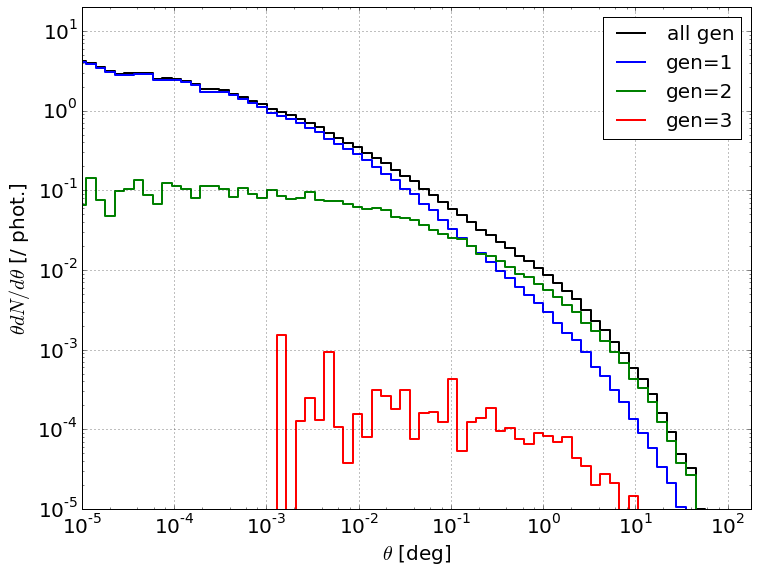

In [2]:
%matplotlib inline
import modules.distribution
modules.distribution.drawArrivalAngle(["simple case EGMF=3e-16G"],plot="generation",yrange=[1e0,2e7])
modules.distribution.drawArrivalAngle(["EGMF=1e-15G"],plot="generation",yrange=[1e-5,2e1])

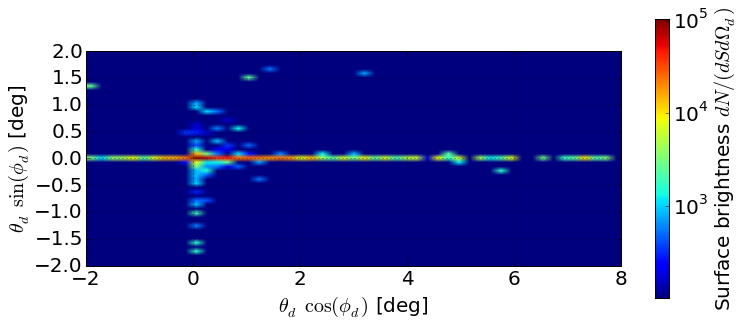

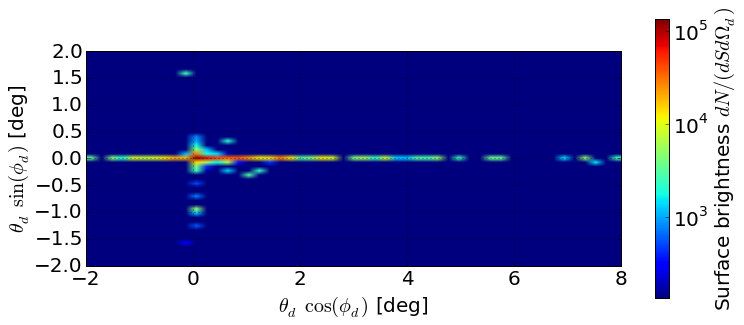

In [15]:
import os
from numpy import loadtxt, select, log, sin, cos, tan, arctan, arccos, exp, sqrt, pi, size
from numpy import append, zeros, linspace, shape
from modules.constants import degre, yr

from matplotlib.pyplot import figure, show
from matplotlib.colors import LogNorm
from matplotlib import rcParams
label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size 

def test(fileId):
   resultsFile="/results.dat"
   # 0 - generation
   # 1 - weight
   # 2 - energy [GeV]
   # 3 - time delay [s]
   # 4,5,6 - theta_pos, theta_dir, phi_dir [rad]
   # 7 - source photon energy [GeV]
   gen, wi, E, dt, theta_p, theta_d, phi_d, E0 = loadtxt(fileId+resultsFile,unpack=True)
   theta_d = theta_p -theta_d

   fig = figure(figsize=(12,5))
   ax = fig.add_subplot(111) 

   steps_by_degre = 5
   borne=[5,5]
   philim=float(borne[0])
   thetalim=float(borne[1])
   bining = array([int(steps_by_degre*2*thetalim)+1,int(steps_by_degre*2*philim)+1])
   limits = [[-2,2],[-2,8]]

   #H,xedges,yedges,im = ax.hist2d(theta_d*cos(phi_d-pi/2)/degre,theta_d*sin(phi_d-pi/2)/degre,bining,weights=weight,norm=LogNorm(),range=limits)
   H,xedges,yedges = histogram2d(theta_d*cos(phi_d)/degre,theta_d*sin(phi_d)/degre,bining,weights=wi,range=limits)
   lim = 1e-3*amax(H)
   H = select([H>lim,H<=lim],[H,lim])
   im = ax.imshow(H,norm=LogNorm(),extent=(-2,8,-2,2))
   cbar=fig.colorbar(im, ax=ax)
   cbar.ax.set_ylabel("Surface brightness $dN/(dSd\\Omega_d)$",fontsize=label_size)

   ax.set_xlim((-2,8))
   ax.set_ylim((-2,2))
   ax.set_xlabel("$\\theta_d$ $\\cos(\\phi_d)$ [deg]",fontsize=label_size)
   ax.set_ylabel("$\\theta_d$ $\\sin(\\phi_d)$ [deg]",fontsize=label_size)
   ax.grid(b=True,which='major')

test("Simulations/test")  #lambda_B = 1 Mpc
test("Simulations/test2") #lambda_B = 100 Mpc

show()